# Looking at year-to-date fire count and acreage to assess trends 
* [Data source](https://www.nifc.gov/fire-information/nfn)
* Data downloaded on: June 21, 2022
* Data last updated on June 21, 2022, according to source 

**NOTE:** We are using a cleaned csv created in the ETL folder.

In [72]:
import pandas as pd
import numpy as np 

df = pd.read_csv('../data/processed/fire_ytd_clean.csv')
df.head()

,fires,acres,year,ytd_range
0,31000,3215435,2022-01-01,1/1/22-6/21/22
1,28926,1097061,2021-01-01,1/1/21-6/21/21
2,22439,1008914,2020-01-01,1/1/20-6/21/20
3,17875,538959,2019-01-01,1/1/19-6/21/19
4,27421,2170976,2018-01-01,1/1/18-6/21/18


In [73]:
#checking our rows, expected: 11
df.shape

(11, 4)

### Step 1: Checking averages

According to the National Interagency Fire Center, the 10-year averages year-to-date for fires and acres are as follows: 
* Fires: 24,230
* Acres: 1,236,117

I'm going to quickly double check these numbers in my own dataframe, just to make sure I'm working with the data correctly. 

**Steps:**
* First step for this is to exclude 2022 from analysis
* Run mean and median commands for ```acres``` and ```fires```

In [147]:
#removing 2022 numbers from dataframe
df2021 = df[df['year'] < '2022-01-01']
df2021.head()

,fires,acres,year,ytd_range,acres_burned_per_fire,acres_perc_chng,fires_perc_chng,acres_bured_per_fire_perc_chng,total_acres_per_year
1,28926,1097061,2021-01-01,1/1/21-6/21/21,37.926468,0.087368,0.289095,-0.156487,7125643.0
2,22439,1008914,2020-01-01,1/1/20-6/21/20,44.962521,0.871968,0.255329,0.491217,10122336.0
3,17875,538959,2019-01-01,1/1/19-6/21/19,30.151552,-0.751743,-0.348127,-0.619164,4664364.0
4,27421,2170976,2018-01-01,1/1/18-6/21/18,79.172021,-0.157711,-0.018681,-0.141677,8767492.0
5,27943,2577471,2017-01-01,1/1/17-6/21/17,92.240311,0.315496,0.191447,0.104116,10026086.0


In [75]:
#checking averages
#expected outcome, according to source linked above: 
    #Acres: 1,236,117
    
print('acres mean: ', df2021.acres.mean())
print('acres median: ', df2021.acres.median())

acres mean:  1271643.8
acres median:  1052987.5


In [76]:
#expected outcome, according to source linked above: 
    #Fires: 24,230
print('fires mean: ', df2021.fires.mean())
print('fires median: ', df2021.fires.median())

fires mean:  24394.0
fires median:  24894.0


**CONCLUSION:** It seems the National Interagency Fire Center did use mean over median, but the means are still slighty misaligned. They are close enough to lead me to believe there is a methodological choice the Center made that maybe is not documented on this page. I will proceed with my own analysis, but this is something I would ask them about before publishing a story.

### Step 2: Statistical analysis

Now, I want to see whether or not the fire count and acreage for 2022 YTD is higher than what would otherwise be expected. In order to do that, I'm going to find some basic statistical information about both categories first. 

For quick reference: 
* 2022 fires: 31,000
* 2022 acres: 3,215,435

**Steps:**
* Run .describe() for basic statistics on ```fires``` and ```acres```
* Plot distribution of both columns (although so few data points that this is not entirely useful) 
* calculate whether or not 2022 falls 2 standard deviations above the mean for each field 

In [77]:
#Grabbing basic stats on fire count

df.fires.describe()
# 2022 fires is just under 2 standard deviations above the mean 

count       11.000000
mean     24994.545455
std       3834.529524
min      17875.000000
25%      22946.000000
50%      25322.000000
75%      27682.000000
max      31000.000000
Name: fires, dtype: float64

<AxesSubplot:>

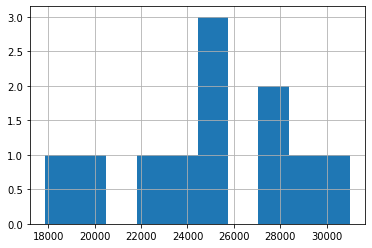

In [142]:
#Plotting distribution of fire count
df.fires.hist()

In [79]:
#Grabbing basic stats on acres burned YTD

df.acres.describe()
#2022 acres is also just under 2 standard deviations away from mean 

count    1.100000e+01
mean     1.448352e+06
std      8.929776e+05
min      5.389590e+05
25%      7.819480e+05
50%      1.097061e+06
75%      2.065146e+06
max      3.215435e+06
Name: acres, dtype: float64

<AxesSubplot:>

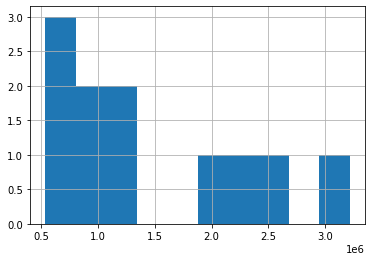

In [143]:
#Plotting distribution of acres burned YTD

df.acres.hist()

**CONCLUSION:** Neither fire count nor acres burned YTD fall above two st. devs. above the mean for both fields since 2012. Therefore, we cannot conlude that either are outliers. It's still possible they become outliers within the context of the last decade in the coming months, as wildfire season is just beginning, but right now, the most we can conclude is that both fields are higher than they have ever been by this point in the year since at least 2012. 

## Step 3: Initial plotting 

Below, I'm using some quick tools to get an idea of what a visualization for this peice might look like. 

**Steps:**
* Using matplotlib, plot acres burned YTD
* Using matplotlib, plot fire count YTD 
* Create ```acres_burned_per_fire``` column
    * Plot using Plotnine

<AxesSubplot:title={'center':'Acres burned to-date 2012-2021, 6-21-22'}>

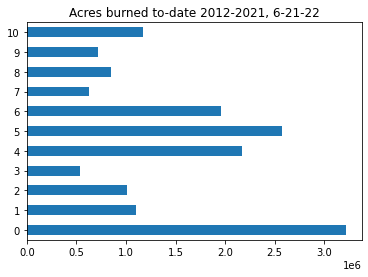

In [93]:
#Quick plotting of acres burned to-date, with 2012 on top and 2022 on the bottom

df.acres.plot(kind='barh', x='year', y='acres', title='Acres burned to-date 2012-2021, 6-21-22')


<AxesSubplot:title={'center':'Fire count to-date 2012-2021, 6-21-22'}>

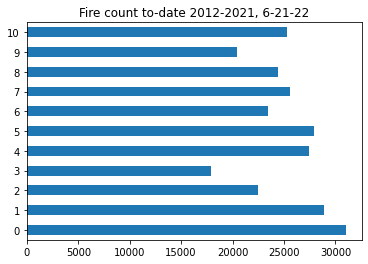

In [91]:
#Quick plotting of fire count YTD, with 2012 on top and 2022 on the bottom

df.fires.plot(kind='barh', x='year', y='fires', title='Fire count to-date 2012-2021, 6-21-22')

#take away from plots alone: There are slightly more fires to-date than any year since 2012,
    # and these fires seem to be covering a much wider area --> let's create a new field for acres burned per fire

In [96]:
#Calculating acres per fire to-date and adding it to our df
df['acres_burned_per_fire'] = df['acres']/df['fires']

In [102]:
#Which year is the highest by acres burned per fire, to-date?

df.sort_values('acres_burned_per_fire', ascending=False)
#Answer: 2022

,fires,acres,year,ytd_range,acres_burned_per_fire
0,31000,3215435,2022-01-01,1/1/22-6/21/22,103.723710
5,27943,2577471,2017-01-01,1/1/17-6/21/17,92.240311
6,23453,1959315,2016-01-01,1/1/16-6/21/16,83.542191
4,27421,2170976,2018-01-01,1/1/18-6/21/18,79.172021
10,25322,1175960,2012-01-01,1/1/12-6/21/12,46.440250
2,22439,1008914,2020-01-01,1/1/20-6/21/20,44.962521
1,28926,1097061,2021-01-01,1/1/21-6/21/21,37.926468
9,20462,719930,2013-01-01,1/1/13-6/21/13,35.183755
8,24466,843966,2014-01-01,1/1/14-6/21/14,34.495463
3,17875,538959,2019-01-01,1/1/19-6/21/19,30.151552


/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:201: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


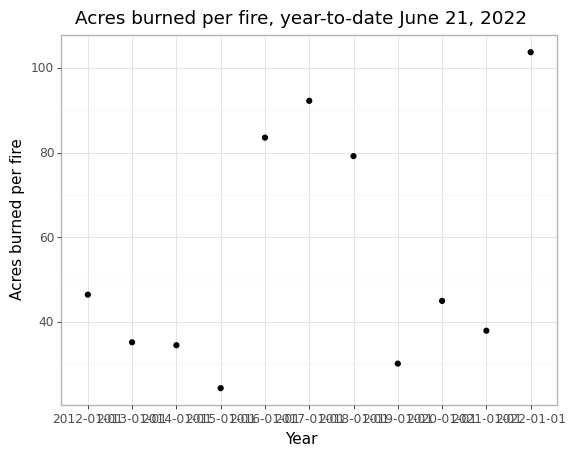

<ggplot: (288313053)>

In [118]:
#Rough-ploting acres burned by year using plotnine 

from plotnine.data import mtcars
from plotnine import *

(
    ggplot(df,
          aes('year', 'acres_burned_per_fire'))
    +geom_point()
    +geom_smooth()
   # +stat_smooth(method='lm')
    +theme_light()
    + labs(
        title = "Acres burned per fire, year-to-date June 21, 2022",
        y = "Acres burned per fire",
        x = "Year"
        )
)


## Step 4: Calculate percent change

After looking at the data, I'm interested in the percent change for ```acres```, ```fires```, and ```acres_bured_per_fire```. I want to see if percent change in any of these fields might actually be the most useful variable to plot. If nothing else, having context for the percent change is helpful/essential in analyzing 2022's numbers in the context of years past.

**Steps:**
* Caluclate % change for each field and append to dataframe
* Take a look at which years show the highest % change 

In [117]:
#Adding percent change columns for acres burned, fire count, and acres burned per fire, to-datee
df['acres_perc_chng'] = df.acres.pct_change(-1)
df['fires_perc_chng'] = df.fires.pct_change(-1)
df['acres_bured_per_fire_perc_chng'] = df.acres_burned_per_fire.pct_change(-1)
df.head()

,fires,acres,year,ytd_range,acres_burned_per_fire,acres_perc_chng,fires_perc_chng,acres_bured_per_fire_perc_chng
0,31000,3215435,2022-01-01,1/1/22-6/21/22,103.723710,1.930954,0.071700,1.734863
1,28926,1097061,2021-01-01,1/1/21-6/21/21,37.926468,0.087368,0.289095,-0.156487
2,22439,1008914,2020-01-01,1/1/20-6/21/20,44.962521,0.871968,0.255329,0.491217
3,17875,538959,2019-01-01,1/1/19-6/21/19,30.151552,-0.751743,-0.348127,-0.619164
4,27421,2170976,2018-01-01,1/1/18-6/21/18,79.172021,-0.157711,-0.018681,-0.141677


In [125]:
#Taking a look at where there has been the greatest percent change since 2012 for each category

df.sort_values('acres_bured_per_fire_perc_chng', ascending=False).head(3)

#ACRES BURNED PER FIRE: biggest change in 2016 year-to-date, followed by 2022 and 2022

,fires,acres,year,ytd_range,acres_burned_per_fire,acres_perc_chng,fires_perc_chng,acres_bured_per_fire_perc_chng
6,23453,1959315,2016-01-01,1/1/16-6/21/16,83.542191,2.140502,-0.085047,2.432417
0,31000,3215435,2022-01-01,1/1/22-6/21/22,103.723710,1.930954,0.071700,1.734863
2,22439,1008914,2020-01-01,1/1/20-6/21/20,44.962521,0.871968,0.255329,0.491217


In [128]:
df.sort_values('acres_perc_chng', ascending=False).head(3)

#ACRES: biggest change in 2016 year-to-date, followed by 2022 and 2020

,fires,acres,year,ytd_range,acres_burned_per_fire,acres_perc_chng,fires_perc_chng,acres_bured_per_fire_perc_chng
6,23453,1959315,2016-01-01,1/1/16-6/21/16,83.542191,2.140502,-0.085047,2.432417
0,31000,3215435,2022-01-01,1/1/22-6/21/22,103.723710,1.930954,0.071700,1.734863
2,22439,1008914,2020-01-01,1/1/20-6/21/20,44.962521,0.871968,0.255329,0.491217


In [129]:
df.sort_values('fires_perc_chng', ascending=False).head(3)

#FIRES: biggest change in 2021 year-to-date, followed by 2020 and 2014

,fires,acres,year,ytd_range,acres_burned_per_fire,acres_perc_chng,fires_perc_chng,acres_bured_per_fire_perc_chng
1,28926,1097061,2021-01-01,1/1/21-6/21/21,37.926468,0.087368,0.289095,-0.156487
2,22439,1008914,2020-01-01,1/1/20-6/21/20,44.962521,0.871968,0.255329,0.491217
8,24466,843966,2014-01-01,1/1/14-6/21/14,34.495463,0.172289,0.195680,-0.019563


In [148]:
df

,fires,acres,year,ytd_range,acres_burned_per_fire,acres_perc_chng,fires_perc_chng,acres_bured_per_fire_perc_chng,total_acres_per_year
0,31000,3215435,2022-01-01,1/1/22-6/21/22,103.723710,1.930954,0.071700,1.734863,NaN
1,28926,1097061,2021-01-01,1/1/21-6/21/21,37.926468,0.087368,0.289095,-0.156487,7125643.0
2,22439,1008914,2020-01-01,1/1/20-6/21/20,44.962521,0.871968,0.255329,0.491217,10122336.0
3,17875,538959,2019-01-01,1/1/19-6/21/19,30.151552,-0.751743,-0.348127,-0.619164,4664364.0
4,27421,2170976,2018-01-01,1/1/18-6/21/18,79.172021,-0.157711,-0.018681,-0.141677,8767492.0
5,27943,2577471,2017-01-01,1/1/17-6/21/17,92.240311,0.315496,0.191447,0.104116,10026086.0
6,23453,1959315,2016-01-01,1/1/16-6/21/16,83.542191,2.140502,-0.085047,2.432417,5509995.0
7,25633,623886,2015-01-01,1/1/15-6/21/15,24.339172,-0.260769,0.047699,-0.294424,10125149.0
8,24466,843966,2014-01-01,1/1/14-6/21/14,34.495463,0.172289,0.195680,-0.019563,3595613.0
9,20462,719930,2013-01-01,1/1/13-6/21/13,35.183755,-0.387794,-0.191928,-0.242387,4319546.0


**CONCLUSION:** While not particularly helpful for plotting, here are some key takeaways regarding % change: 
* From 2021 to 2022, there has been a nearly 200% increase in acres burned to-date
* From 2021 to 2022, there has been a 7% increase in fire count to-date
    * These numbers seem to imply fires are BIGGER than in 2021, which is why I calculated acres burned per fire. Still, this conclusion would need to be verified with an expert. 
* From 2021 to 2022, there has been a 173% increase in acres burned per fire

## Step 5: Adding total acres burned per year, 2012-2021, for visualization purposes

The above draft graphs are helpful, but I am already imagining something that might be MORE helpful than the information we currently have. We know it's a bit too early to say whether or not this year's wildfires are definitively worse than years' past, so why not compare year-to-date infomrmation with total acres burned for each year in the last 10 years? We won't know until we look at the numbers, but I wonder whether or not including this informaiton in our visual (perhaps as a stacked bar graph or area chart, if appropriate), would tell a better story. It's worth a shot, so I'm grabbing this information and appending it to the df below. 

This info does not seem to be in a handy table like our year-to-date statistics. Instead, it's embedded in a separate PDF for each year the NIFC has info on ([here is an example from 2021](https://www.predictiveservices.nifc.gov/intelligence/2021_statssumm/historical_data21.pdf)). This is another instance where I *could* build a scrapper to go in and grab that info from the PDF. If I wanted an entire table's worth of information from each PDF, that option might be worth it, but given I only need 10 numbers, I'm going to take a few minutes to copy and paste them here and append them to the df.

[Data source](https://www.nifc.gov/fire-information/statistics): Under "Wild Fire Summaries" --> "Historical Data Comparisons" --> "Wildfire Acres Burned" 

**Steps:**
* Create a dictionary to pass through df with new total acres burned per year info
* Append to df
* Export this df to CSV

In [130]:
# Creating a dictionary to pass through our df. Could be done with a list as well, but I chose this format
    # to ensure I didn't lose track of the year+acreage pairing
total_acres_per_year = {
    np.nan: '2022-01-01',
    7125643: '2021-01-01',
    10122336: '2020-01-01',
    4664364: '2019-01-01',
    8767492:  '2018-01-01',
    10026086: '2017-01-01',
    5509995: '2016-01-01',
    10125149: '2015-01-01',
    3595613: '2014-01-01',
    4319546: '2013-01-01',
    7583783: '2012-01-01'
}

In [131]:
# Creating a new column for our df 
df['total_acres_per_year'] = total_acres_per_year

In [132]:
# Checking to make sure everything is in order — it is.
df

,fires,acres,year,ytd_range,acres_burned_per_fire,acres_perc_chng,fires_perc_chng,acres_bured_per_fire_perc_chng,total_acres_per_year
0,31000,3215435,2022-01-01,1/1/22-6/21/22,103.723710,1.930954,0.071700,1.734863,NaN
1,28926,1097061,2021-01-01,1/1/21-6/21/21,37.926468,0.087368,0.289095,-0.156487,7125643.0
2,22439,1008914,2020-01-01,1/1/20-6/21/20,44.962521,0.871968,0.255329,0.491217,10122336.0
3,17875,538959,2019-01-01,1/1/19-6/21/19,30.151552,-0.751743,-0.348127,-0.619164,4664364.0
4,27421,2170976,2018-01-01,1/1/18-6/21/18,79.172021,-0.157711,-0.018681,-0.141677,8767492.0
5,27943,2577471,2017-01-01,1/1/17-6/21/17,92.240311,0.315496,0.191447,0.104116,10026086.0
6,23453,1959315,2016-01-01,1/1/16-6/21/16,83.542191,2.140502,-0.085047,2.432417,5509995.0
7,25633,623886,2015-01-01,1/1/15-6/21/15,24.339172,-0.260769,0.047699,-0.294424,10125149.0
8,24466,843966,2014-01-01,1/1/14-6/21/14,34.495463,0.172289,0.195680,-0.019563,3595613.0
9,20462,719930,2013-01-01,1/1/13-6/21/13,35.183755,-0.387794,-0.191928,-0.242387,4319546.0


In [137]:
#save to csv
#df_plot.to_csv('../data/processed/wildfire_calculations.csv', index=False)

## Step 6: Wrangle data to plot 

Wow so much info! We're going to use DataWrapper to plot this info, so let's make it a bit simpler for the program to read.

**Steps:** 
* grab only the columns we need
* calculate difference between ytd aces burned and total acres per year
* simplify df again with difference column and ytd acres burned to make a stacked bar chart
* export to csv


In [133]:
#Grabbing the columns we need from this df

df_plot = df[['year','acres', 'total_acres_per_year']]
df_plot.head()

,year,acres,total_acres_per_year
0,2022-01-01,3215435,NaN
1,2021-01-01,1097061,7125643.0
2,2020-01-01,1008914,10122336.0
3,2019-01-01,538959,4664364.0
4,2018-01-01,2170976,8767492.0


In [134]:
#Calculating difference between 'acres' and 'total_acres_per_year' so we can make a stacked bar

df_plot['difference'] = df_plot['total_acres_per_year'] - df_plot['acres']
df_plot.head()

/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_22241/1870267523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year,acres,total_acres_per_year,difference
0,2022-01-01,3215435,NaN,NaN
1,2021-01-01,1097061,7125643.0,6028582.0
2,2020-01-01,1008914,10122336.0,9113422.0
3,2019-01-01,538959,4664364.0,4125405.0
4,2018-01-01,2170976,8767492.0,6596516.0


In [136]:
#dropping 'total_acres_per_year' because we no longer need it in order to plot 
df_plot = df_plot.drop(columns='total_acres_per_year')
df_plot.head()

,year,acres,difference
0,2022-01-01,3215435,NaN
1,2021-01-01,1097061,6028582.0
2,2020-01-01,1008914,9113422.0
3,2019-01-01,538959,4125405.0
4,2018-01-01,2170976,6596516.0


In [138]:
# Exporting to csv
#df_plot.to_csv('../data/processed/wildfires_stacked_bar.csv', index=False)